In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

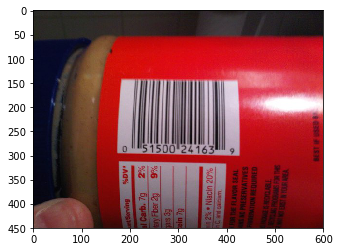

In [2]:
# load the image and convert it to grayscale
image = cv2.imread('./test.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
plt.imshow(cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB))


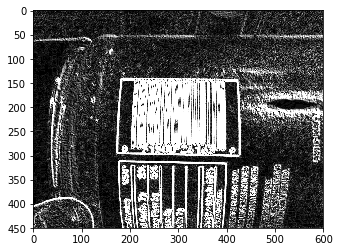

In [3]:
# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.imshow(gradient, cmap='gray')

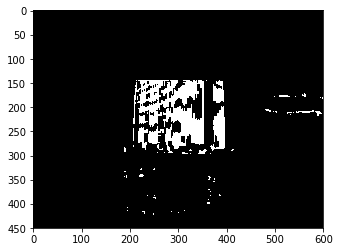

In [5]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

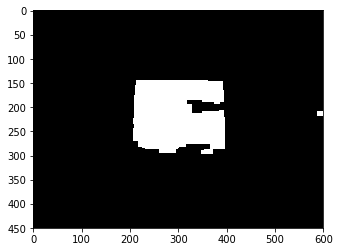

In [6]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

plt.imshow(closed, cmap='gray')

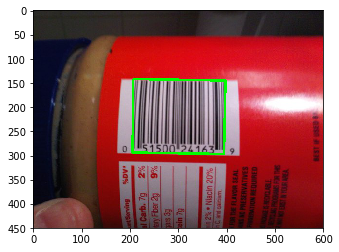

In [7]:
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
(_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
 
# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(image, code=cv2.COLOR_BGR2RGB))

In [8]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [15]:
def process_image(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction
    gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
    gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

     # construct a closing kernel and apply it to the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # perform a series of erosions and dilations
    closed = cv2.erode(closed, None, iterations = 4)
    closed = cv2.dilate(closed, None, iterations = 4)

    # find the contours in the thresholded image, then sort the contours
    # by their area, keeping only the largest one
    (_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
 
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))

    # draw a bounding box arounded the detected barcode and display the
    # image
    cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
     
    return image

In [16]:
detect_output = './test1_out.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("./test1.mp4")
detect_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time detect_clip.write_videofile(detect_output, audio=False)

[MoviePy] >>>> Building video ./test1_out.mp4
[MoviePy] Writing video ./test1_out.mp4


100%|██████████| 262/262 [00:03<00:00, 72.39it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./test1_out.mp4 

CPU times: user 5.39 s, sys: 1.39 s, total: 6.78 s
Wall time: 3.97 s


In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(detect_output))